# 1. Introduction

So far, we've learned how to use the pandas library and how to create visualizations with data sets that didn't require much cleanup. However, most data sets in real life require extensive cleaning and manipulation to extract any meaningful insights. In fact, Forbes estimates that data scientists spend about 60% of their time cleaning and organizing data, so it's critical to be able to manipulate data quickly and efficiently.

In this course, we'll learn the following:

* Data aggregation
* How to combine data
* How to transform data
* How to clean strings with pandas
* How to handle missing and duplicate data

Throughout this course, we'll work to answer the following questions:

* How can aggregating the data give us more insight into happiness scores?
* How did world happiness change from 2015 to 2017?
* Which factors contribute the most to the happiness score?

# 2. Introduction to the Data

You can find the data [here](https://www.kaggle.com/unsdsn/world-happiness).

The data set is a CSV file called World_Happiness_2015.csv. Below are descriptions for some of the columns we'll be working with:

* Country - Name of the country.
* Region - Name of the region the country belongs to.
* Happiness Rank - The rank of the country, as determined by its happiness score.
* Happiness Score - A score assigned to each country based on the answers to a poll question that asks respondents to rate * their happiness on a scale of 0-10.
* Family - The estimated extent to which family contributes to the happiness score.
* Freedom - The estimated extent to which freedom contributes to the happiness score.
* Generosity - The estimated extent to which generosity contributes to the happiness score.

In [1]:
import pandas as pd
happiness2015=pd.read_csv('World_Happiness_2015.csv')
happiness2015.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [2]:
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


# 3. Using Loops to Aggregate Data

let's visualize the happiness score of each country in happiness2015

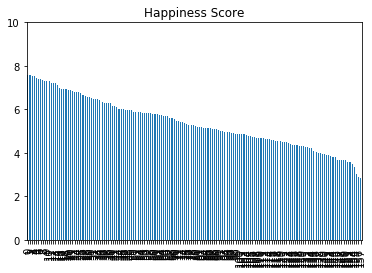

In [3]:
%matplotlib inline
happiness2015['Happiness Score'].plot(kind='bar',title='Happiness Score',ylim=(0,10))

Plotting the data in its current form isn't helpful at all! There are so many data points that we can't see any of the values or labels.

You may have noticed that each country in the happiness2015 dataframe is assigned to a region, specified in the Region column. We can use the Series.unique() method to confirm the unique regions:

In [4]:
happiness2015['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

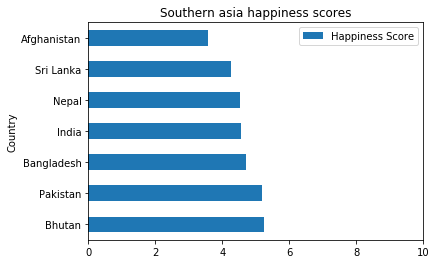

In [5]:
south_asia=happiness2015[happiness2015['Region']=='Southern Asia']
south_asia.plot(x='Country',y='Happiness Score',kind='barh',xlim=(0,10),title='Southern asia happiness scores')

It's much easier to read this visualization - we can clearly see the labels and values. However, we wouldn't know if the Southern Asia region is representative of the entire world unless we look at the other regions. What we really want is to create a visualization that uses one number, a summary statistic like the mean, to summarize the data for each region.

## TODO:
* Create an empty dictionary named mean_happiness to store the results of this exercise.
* Use the Series.unique() method to create an array of unique values for the Region column.
* Use a for loop to iterate over the unique region values from the Region column.
* Assign the rows belonging to the current region to a variable named region_group.
* Use the Series.mean() method to calculate the mean happiness score for region_group.
* Assign the mean value to the mean_happiness dictionary, using the region name as the key and the mean happiness score as the value.

In [6]:
mean_happiness={}
regions=happiness2015['Region'].unique()

for region in regions:
    region_group=happiness2015[happiness2015['Region']==region]
    mean_happiness[region]=region_group['Happiness Score'].mean()

print(mean_happiness)

{'Western Europe': 6.689619047619048, 'North America': 7.273, 'Australia and New Zealand': 7.285, 'Middle East and Northern Africa': 5.406899999999999, 'Latin America and Caribbean': 6.144681818181818, 'Southeastern Asia': 5.317444444444445, 'Central and Eastern Europe': 5.332931034482758, 'Eastern Asia': 5.626166666666666, 'Sub-Saharan Africa': 4.202800000000001, 'Southern Asia': 4.580857142857143}


# 4. The GroupBy Operation

Let's break down the code we wrote in the previous screen into three steps:

* Split the dataframe into groups.
* Apply a function to each group.
* Combine the results into one data structure.

As with many other common tasks, pandas has a built-in operation for this process. The groupby operation performs the "split-apply-combine" process on a dataframe, but condenses it into two steps:

* Create a GroupBy object.
* Call a function on the GroupBy object.

Creating the initial mapping document, or GroupBy object, allows us to optimize our work, because we no longer have to refer back to the original dataframe. By working with the groupby operation, we make our code faster, more flexible, and easier to read.

# 5. Creating GroupBy Objects

To create a GroupBy object, we use the DataFrame.groupby() method:

`df.groupby('col')`

where col is the column you want to use to group the data set.
**Note that you can also group the data set on multiple columns by passing a list into the DataFrame.groupby() method.**

**`When choosing the column, think about which columns could be used to split the data set into groups. To put it another way, look at columns with the same value for multiple rows`**.

In [7]:
happiness2015['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

Since there's a small number of groups and each group contains more than one unique value, we can confirm the Region column is a good candidate to group by

We'll start by using the `GroupBy.get_group()` method to select data for a certain group.

## TODO:
* Use the df.groupby() method to group happiness2015 by the Region column. Assign the result to grouped.
* Use the GroupBy.get_group() method to select the data for the Australia and New Zealand group only. Assign the result to aus_nz.

In [8]:
grouped=happiness2015.groupby('Region')
grouped

In [9]:
aus_nz=grouped.get_group('Australia and New Zealand')
aus_nz

Country                     Region  Happiness Rank  Happiness Score  \
8  New Zealand  Australia and New Zealand               9            7.286   
9    Australia  Australia and New Zealand              10            7.284   

   Standard Error  Economy (GDP per Capita)   Family  \
8         0.03371                   1.25018  1.31967   
9         0.04083                   1.33358  1.30923   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
8                   0.90837  0.63938                        0.42922   
9                   0.93156  0.65124                        0.35637   

   Generosity  Dystopia Residual  
8     0.47501            2.26425  
9     0.43562            2.26646

# 6. Exploring GroupBy Objects

We can also use the `GroupBy.groups` attribute to get more information about the GroupBy object:

In [10]:
grouped.groups

{'Australia and New Zealand': Int64Index([8, 9], dtype='int64'),
 'Central and Eastern Europe': Int64Index([ 30,  43,  44,  51,  53,  54,  55,  58,  59,  61,  63,  68,  69,
              72,  76,  79,  82,  85,  86,  88,  92,  94,  95, 103, 105, 110,
             126, 129, 133],
            dtype='int64'),
 'Eastern Asia': Int64Index([37, 45, 46, 71, 83, 99], dtype='int64'),
 'Latin America and Caribbean': Int64Index([ 11,  13,  15,  22,  24,  26,  29,  31,  32,  39,  40,  41,  42,
              47,  50,  52,  56,  57,  64,  97, 104, 118],
            dtype='int64'),
 'Middle East and Northern Africa': Int64Index([ 10,  19,  21,  27,  34,  38,  48,  62,  67,  75,  81,  91, 102,
             106, 107, 109, 111, 134, 135, 155],
            dtype='int64'),
 'North America': Int64Index([4, 14], dtype='int64'),
 'Southeastern Asia': Int64Index([23, 33, 60, 73, 74, 89, 98, 128, 144], dtype='int64'),
 'Southern Asia': Int64Index([78, 80, 108, 116, 120, 131, 152], dtype='int64'),
 'Sub-Saharan

## TODO:
For the following exercise, use the result from the dictionary returned by grouped.groups shown below:

'North America': Int64Index([4, 14], dtype='int64'

* Prove that the values for the 'North America' group in the dictionary returned by grouped.groups above correspond to countries in North America in the happiness2015 dataframe.
* Use the snippet above to identify the indexes of the countries in happiness2015 that belong to the North America group.
* Use the indexes to assign just the countries in North America in happiness2015 to north_america.
* Use the GroupBy.get_group() method to select the data for the North America group only. Assign the result to na_group.
* Use the following code to compare north_america and na_group: north_america == na_group. Assign the result to equal.

In [11]:
grouped = happiness2015.groupby('Region')
north_america=happiness2015.iloc[[4,14]]
na_group=grouped.get_group('North America')
equal=north_america==na_group
equal

Country  Region  Happiness Rank  Happiness Score  Standard Error  \
4      True    True            True             True            True   
14     True    True            True             True            True   

    Economy (GDP per Capita)  Family  Health (Life Expectancy)  Freedom  \
4                       True    True                      True     True   
14                      True    True                      True     True   

    Trust (Government Corruption)  Generosity  Dystopia Residual  
4                            True        True               True  
14                           True        True               True

# 7. Common Aggregation Methods with Groupby

A basic example of aggregation is computing the number of rows for each of the groups. We can use the `GroupBy.size()` method to confirm the size of each region group:

In [12]:
grouped.size()

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

<block><pre>
Pandas has built in a number of other common aggregation methods:

Methods	Description
mean()	Calculates the mean of groups.
sum()	Calculates the sum of group values.
size()	Calculates the size of the groups.
count()	Calculates the count of values in groups.
min()	Calculates the minimum of group values.
max()	Calculates the maximum of group values.
<block></pre>

## TODO:
Apply the GroupBy.mean() method to grouped. Assign the result to means.

In [13]:
means=grouped.mean()
means

Happiness Rank  Happiness Score  \
Region                                                             
Australia and New Zealand              9.500000         7.285000   
Central and Eastern Europe            79.000000         5.332931   
Eastern Asia                          64.500000         5.626167   
Latin America and Caribbean           46.909091         6.144682   
Middle East and Northern Africa       77.600000         5.406900   
North America                         10.000000         7.273000   
Southeastern Asia                     81.222222         5.317444   
Southern Asia                        113.142857         4.580857   
Sub-Saharan Africa                   127.900000         4.202800   
Western Europe                        29.523810         6.689619   

                                 Standard Error  Economy (GDP per Capita)  \
Region                                                                      
Australia and New Zealand              0.037270                  1.291880   
Central and Eastern Europe             0.045208                  0.942438   
Eastern Asia                           0.037225                  1.151780   
Latin America and Caribbean            0.061127                  0.876815   
Middle East and Northern Africa        0.046337                  1.066973   
North America                          0.036960                  1.360400   
Southeastern Asia                      0.042691                  0.789054   
Southern Asia                          0.032161                  0.560486   
Sub-Saharan Africa                     0.055299                  0.380473   
Western Europe                         0.037625                  1.298596   

                                   Family  Health (Life Expectancy)   Freedom  \
Region                                                                          
Australia and New Zealand        1.314450                  0.919965  0.645310   
Central and Eastern Europe       1.053042                  0.718774  0.358269   
Eastern Asia                     1.099427                  0.877388  0.462490   
Latin America and Caribbean      1.104720                  0.703870  0.501740   
Middle East and Northern Africa  0.920490                  0.705616  0.361751   
North America                    1.284860                  0.883710  0.589505   
Southeastern Asia                0.940468                  0.677357  0.557104   
Southern Asia                    0.645321                  0.540830  0.373337   
Sub-Saharan Africa               0.809085                  0.282332  0.365944   
Western Europe                   1.247302                  0.909148  0.549926   

                                 Trust (Government Corruption)  Generosity  \
Region                                                                       
Australia and New Zealand                             0.392795    0.455315   
Central and Eastern Europe                            0.086674    0.152264   
Eastern Asia                                          0.127695    0.225885   
Latin America and Caribbean                           0.117172    0.217788   
Middle East and Northern Africa                       0.181702    0.190375   
North America                                         0.244235    0.429580   
Southeastern Asia                                     0.151276    0.419261   
Southern Asia                                         0.102536    0.341429   
Sub-Saharan Africa                                    0.123878    0.221137   
Western Europe                                        0.231463    0.302109   

                                 Dystopia Residual  
Region                                              
Australia and New Zealand                 2.265355  
Central and Eastern Europe                2.021400  
Eastern Asia                              1.681607  
Latin America and Caribbean               2.622577  
Middle East and Northern Africa           1.980009  
North Amer

# 8. Aggregating Specific Columns with Groupby

## TODO:
* Select just the Happiness Score column from grouped. Assign the result to happy_grouped.
* Use the GroupBy.mean() method to compute the mean of happy_grouped. Assign the result to happy_mean.

In [14]:
happy_grouped=grouped['Happiness Score']
happy_mean=happy_grouped.mean()
happy_mean

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

# 9. Introduction to the Agg() Method

However, what if we wanted to apply more than one kind of aggregation to a column at a time?

Luckily, however, the `GroupBy.agg() method can perform both aggregations at once`. We can use the following syntax:

`Agg_Syntax=groupby.agg([func_1,func_2,func_3])`

## TODO:
* Apply the GroupBy.agg() method to happy_grouped. Pass a list containing mean and max into the method. Assign the result to happy_mean_max.
* We've also created a custom function named dif to calculate the difference between the mean and maximum values. Pass dif into the GroupBy.agg() method. Assign the result to mean_max_dif.

In [15]:
happy_mean_max=happy_grouped.agg(['mean','max'])
happy_mean_max

mean    max
Region                                          
Australia and New Zealand        7.285000  7.286
Central and Eastern Europe       5.332931  6.505
Eastern Asia                     5.626167  6.298
Latin America and Caribbean      6.144682  7.226
Middle East and Northern Africa  5.406900  7.278
North America                    7.273000  7.427
Southeastern Asia                5.317444  6.798
Southern Asia                    4.580857  5.253
Sub-Saharan Africa               4.202800  5.477
Western Europe                   6.689619  7.587

In [16]:
def dif(group):
    return (group.max() - group.mean())

mean_max_diff=happy_grouped.agg(dif)

# 10. Computing Multiple and Custom Aggregations with the Agg() Method

In the last exercise, we learned we can use the GroupBy.agg() method to:

* Perform more than one aggregation at once.
* Compute custom aggregations.

To compute multiple aggregations at once, we passed a list of the function names into the agg method:

## TODO:

* Inspect the following code: happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean().
  * If we run the code above, will the index of happiness_means be the unique values in the Region column or the Happiness Score column?
  * Will the values aggregated in happiness_means be the values from the Region column or the Happiness Score column?
  * Print happiness_means. Were your predictions correct?

In [17]:
 happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()
happiness_means

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

# 11. Aggregation with Pivot Tables

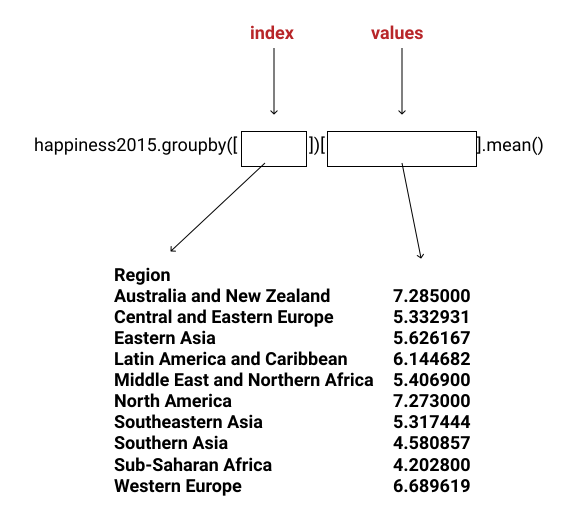

In [18]:
from IPython.display import SVG
SVG(url='https://s3.amazonaws.com/dq-content/343/PV_Syntax.svg')

Index and values are actually arguments used in another method used to aggregate data - the DataFrame.pivot_table() method. This `df.pivot_table() method can perform the same kinds of aggregations as the df.groupby method and make the code for complex aggregations easier to read`.

Below, we use the df.pivot_table() method to perform the same aggregation as above.

In [19]:
happiness2015.pivot_table(index='Region',values='Happiness Score',aggfunc='mean')

Happiness Score
Region                                          
Australia and New Zealand               7.285000
Central and Eastern Europe              5.332931
Eastern Asia                            5.626167
Latin America and Caribbean             6.144682
Middle East and Northern Africa         5.406900
North America                           7.273000
Southeastern Asia                       5.317444
Southern Asia                           4.580857
Sub-Saharan Africa                      4.202800
Western Europe                          6.689619

**Keep in mind that this method returns a dataframe, so normal dataframe filtering and methods can be applied to the result**.

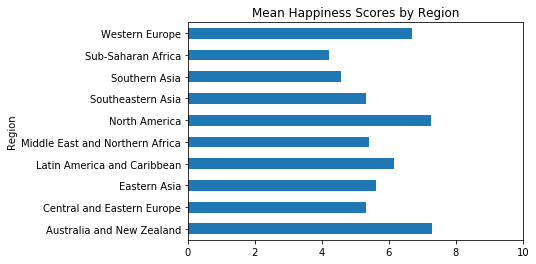

In [20]:
pv_happiness = happiness2015.pivot_table('Happiness Score', 'Region')
pv_happiness.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)

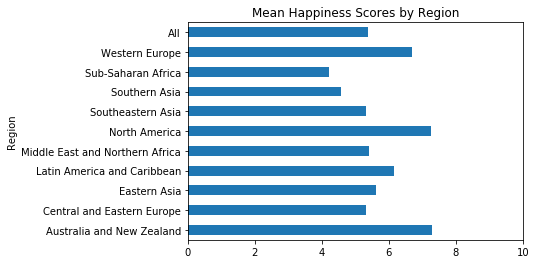

In [21]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc='mean', margins=True)
pv_happiness.plot(kind='barh',xlim=(0,10),title='Mean Happiness Scores by Region',legend=False)
world_mean_happiness=happiness2015['Happiness Score'].mean()

In the last exercise, we learned that when we set the margins parameter equal to True, All will be added to the index of the resulting dataframe and the corresponding value will be the result of applying the aggregation method to the entire column. In our example, All is the mean of the Happiness Score column.

**The pivot_table method also allows us to aggregate multiple columns and apply multiple functions at once.**

# 12. Aggregating Multiple Columns and Functions with Pivot Tables

## TODO:
* Use the df.groupby() method to calculate the minimum, maximum, and mean family and happiness scores for each region in happiness2015.
  * Group happiness2015 by the Region column.
  * Select the Happiness Score and Family columns. Assign the result to grouped.
  * Apply the GroupBy.agg() method to grouped. Pass a list containing np.min, np.max, and np.mean into the method.
  * Assign the result to happy_family_stats.
* Use the pivot_table method to return the same information, but also calculate the the minimum, maximum, and mean for the entire Family and Happiness Score columns.
  * The aggregation columns should be Happiness Score and Family.
  * The column to group by is Region.
  * The aggregation functions are np.min, np.max, and np.mean.
  * Set the margins parameter equal to True.
  * Assign the result to pv_happy_family_stats.

In [22]:
grouped=happiness2015.groupby('Region')['Happiness Score','Family']
happy_family_stats=grouped.agg(['min','max','mean'])
happy_family_stats

Happiness Score                    Family  \
                                            min    max      mean      min   
Region                                                                      
Australia and New Zealand                 7.284  7.286  7.285000  1.30923   
Central and Eastern Europe                4.218  6.505  5.332931  0.38562   
Eastern Asia                              4.874  6.298  5.626167  0.94675   
Latin America and Caribbean               4.518  7.226  6.144682  0.74302   
Middle East and Northern Africa           3.006  7.278  5.406900  0.47489   
North America                             7.119  7.427  7.273000  1.24711   
Southeastern Asia                         3.819  6.798  5.317444  0.62736   
Southern Asia                             3.575  5.253  4.580857  0.30285   
Sub-Saharan Africa                        2.839  5.477  4.202800  0.00000   
Western Europe                            4.857  7.587  6.689619  0.89318   

                                                    
                                     max      mean  
Region                                              
Australia and New Zealand        1.31967  1.314450  
Central and Eastern Europe       1.34043  1.053042  
Eastern Asia                     1.30060  1.099427  
Latin America and Caribbean      1.30477  1.104720  
Middle East and Northern Africa  1.22393  0.920490  
North America                    1.32261  1.284860  
Southeastern Asia                1.26504  0.940468  
Southern Asia                    1.10395  0.645321  
Sub-Saharan Africa               1.18468  0.809085  
Western Europe                   1.40223  1.247302

In [23]:
pv_happy_family_stats=happiness2015.pivot_table(['Happiness Score','Family'],'Region',aggfunc=['min','max','mean'],margins=True)
pv_happy_family_stats

min                      max  \
                                  Family Happiness Score   Family   
Region                                                              
Australia and New Zealand        1.30923           7.284  1.31967   
Central and Eastern Europe       0.38562           4.218  1.34043   
Eastern Asia                     0.94675           4.874  1.30060   
Latin America and Caribbean      0.74302           4.518  1.30477   
Middle East and Northern Africa  0.47489           3.006  1.22393   
North America                    1.24711           7.119  1.32261   
Southeastern Asia                0.62736           3.819  1.26504   
Southern Asia                    0.30285           3.575  1.10395   
Sub-Saharan Africa               0.00000           2.839  1.18468   
Western Europe                   0.89318           4.857  1.40223   
All                              0.00000           2.839  1.40223   

                                                     mean                  
                                Happiness Score    Family Happiness Score  
Region                                                                     
Australia and New Zealand                 7.286  1.314450        7.285000  
Central and Eastern Europe                6.505  1.053042        5.332931  
Eastern Asia                              6.298  1.099427        5.626167  
Latin America and Caribbean               7.226  1.104720        6.144682  
Middle East and Northern Africa           7.278  0.920490        5.406900  
North America                             7.427  1.284860        7.273000  
Southeastern Asia                         6.798  0.940468        5.317444  
Southern Asia                             5.253  0.645321        4.580857  
Sub-Saharan Africa                        5.477  0.809085        4.202800  
Western Europe                            7.587  1.247302        6.689619  
All                                       7.587  0.991046        5.375734

In this mission, we learned how to use the groupby operation and the df.pivot_table() method for aggregation